In [1]:
from __future__ import division, print_function

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
pd.set_option("max_rows", 10)
from pprint import pprint

In [4]:
from sklearn.cross_validation import KFold, cross_val_score, cross_val_predict
from sklearn.grid_search import GridSearchCV

In [5]:
from pandas_confusion import ConfusionMatrix

In [6]:
SEED = 10
kf = KFold(n=134, n_folds=20, shuffle=True, random_state=SEED)

In [7]:
os.getcwd()

'/Users/hmourit/Documents/0project/mdd'

## Load data

In [8]:
fac = pd.read_csv('./fac.csv', sep=';', index_col=0)
rma = pd.read_csv('./rma134.csv', index_col=0).transpose()
numbers134 = rma.index.to_series().str.split('_').apply(lambda x: x[1]).astype(int)
with open('rma.pickle', 'wb') as out:
    pickle.dump(rma, out)
rma.head()

ProbeID,1415670_at,1415671_at,1415672_at,1415673_at,1415674_a_at,1415675_at,1415676_a_at,1415677_at,1415678_at,1415679_at,...,1460736_at,1460737_at,1460738_at,1460739_at,1460740_at,1460741_x_at,1460742_at,1460743_at,1460744_at,1460746_at
230107_117_gendep_moe4302_md_a_n_dba_f.CEL,9.087890,11.025595,10.218794,7.375952,8.652590,8.518571,10.673762,8.890630,9.745088,9.441357,...,7.174680,7.342347,5.455882,8.226961,7.905081,8.069678,6.784496,5.042267,4.808693,3.220549
230107_11_gendep_moe4302_cms_a_e_c57_f.CEL,9.122277,11.013614,10.297756,7.627602,8.591699,8.428379,10.678632,8.795049,9.707793,9.749562,...,7.445484,7.360822,5.734060,8.233840,8.071919,8.354469,6.902321,5.023841,4.582879,3.258242
230107_120_gendep_moe4302_md_a_n_fvb_m.CEL,9.060194,10.882136,10.284965,7.504721,8.756083,8.434395,10.537865,8.674806,9.773067,9.794081,...,7.404513,7.286996,5.573860,8.107315,7.841050,7.983196,7.016586,5.023105,4.855476,3.752214
230107_123_gendep_moe4302_md_c_c_c57_f.CEL,8.977349,11.040860,10.215949,7.650994,8.556905,8.546056,10.687612,8.812879,9.658495,9.824554,...,7.403390,7.000761,5.658862,8.325231,7.950617,8.374037,7.069368,4.903711,4.698846,3.589178
230107_137_gendep_moe4302_md_c_n_129_f.CEL,9.078272,11.031812,10.109470,7.583355,8.851798,8.558529,10.834130,8.913428,9.893105,9.807080,...,7.471499,6.833002,5.568804,8.132989,8.300152,7.929929,7.044670,4.989099,5.127954,3.996343


In [8]:
rma.describe()

,1415670_at,1415671_at,1415672_at,1415673_at,1415674_a_at,1415675_at,1415676_a_at,1415677_at,1415678_at,1415679_at,...,1460736_at,1460737_at,1460738_at,1460739_at,1460740_at,1460741_x_at,1460742_at,1460743_at,1460744_at,1460746_at
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,9.052640,10.963781,10.235410,7.553164,8.647302,8.492849,10.673113,8.855308,9.760231,9.673109,...,7.412394,7.152077,5.645245,8.155204,8.011243,8.103965,6.953391,5.005838,4.798135,3.593369
std,0.163821,0.107575,0.105545,0.142877,0.110158,0.088751,0.113147,0.111630,0.097835,0.175558,...,0.132369,0.169724,0.177138,0.183189,0.164319,0.236035,0.138445,0.176334,0.165904,0.169927
min,8.481542,10.669090,9.956977,7.128916,8.363142,8.208683,10.295568,8.525830,9.425264,9.204814,...,7.015401,6.757702,5.230896,7.655579,7.493322,7.448151,6.398781,4.478759,4.300024,3.212933
25%,8.969882,10.886480,10.170566,7.470857,8.576740,8.435659,10.603982,8.778665,9.696627,9.543912,...,7.338650,7.058970,5.527068,8.053347,7.906049,7.952611,6.871058,4.894420,4.692501,3.485775
50%,9.066491,10.968880,10.234384,7.552252,8.651420,8.485925,10.665090,8.858697,9.762639,9.715758,...,7.405846,7.156493,5.620217,8.142759,8.039405,8.090296,6.957019,5.018363,4.788337,3.590937
75%,9.160694,11.040454,10.307158,7.650597,8.721061,8.545865,10.750321,8.926629,9.819891,9.808043,...,7.474665,7.272641,5.764498,8.253929,8.123914,8.261430,7.050953,5.127599,4.916147,3.692183
max,9.355038,11.228308,10.484070,7.944816,8.921479,8.728122,10.987426,9.121714,9.975907,9.974605,...,7.872710,7.570971,6.231210,8.762709,8.371353,8.733479,7.308742,5.399237,5.250657,4.062643


### Targets

In [14]:
DRUGS = ['N', 'E', 'C']
DRUG_MAP = {'N': 0, 'E': 1, 'C': 2}

drug = fac[fac.number.isin(numbers134)]['drug']
rma['drug'] = drug.tolist()
drug = pd.DataFrame()
drug['str'] = rma.pop('drug')
drug['int'] = drug['str'].replace(DRUG_MAP)
drug = drug.join(drug['str'].str.get_dummies())
with open('drug.pickle', 'wb') as out:
    pickle.dump(drug, out)
drug.head()

,str,int,C,E,N
230107_117_gendep_moe4302_md_a_n_dba_f.CEL,N,0,0,0,1
230107_11_gendep_moe4302_cms_a_e_c57_f.CEL,E,1,0,1,0
230107_120_gendep_moe4302_md_a_n_fvb_m.CEL,N,0,0,0,1
230107_123_gendep_moe4302_md_c_c_c57_f.CEL,C,2,1,0,0
230107_137_gendep_moe4302_md_c_n_129_f.CEL,N,0,0,0,1


In [26]:
stress = fac[fac.number.isin(numbers134)]['stress']
rma['stress'] = stress.tolist()
stress = pd.DataFrame()
stress['str'] = rma.pop('stress')
with open('stress.pickle', 'wb') as out:
    pickle.dump(stress, out)
stress.head()

,str
230107_117_gendep_moe4302_md_a_n_dba_f.CEL,MD
230107_11_gendep_moe4302_cms_a_e_c57_f.CEL,CMS
230107_120_gendep_moe4302_md_a_n_fvb_m.CEL,MD
230107_123_gendep_moe4302_md_c_c_c57_f.CEL,MD
230107_137_gendep_moe4302_md_c_n_129_f.CEL,MD


## SVM

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Find best parameters:

In [11]:
retrain = False
if retrain:
    C_range = np.logspace(-2, 7, 10)
    gamma_range = np.logspace(-6, 3, 10)
    param_grid = dict(gamma=gamma_range, C=C_range)
    grid = GridSearchCV(SVC(), param_grid=param_grid, cv=kf, n_jobs=-1)
    grid.fit(rma, drug['str'])

    print("The best parameters are %s with a score of %0.2f"
          % (grid.best_params_, grid.best_score_))
    best_params = grid.best_params_
else:
    best_params = {'C': 1000, 'gamma': 1e-5}

Show results:

In [12]:
clf = SVC(**best_params)
pred = cross_val_predict(clf, rma, y=drug['str'], cv=kf, n_jobs=-1)

Accuracy: 0.417910447761 

             precision    recall  f1-score   support

          C       0.52      0.48      0.50        46
          E       0.35      0.41      0.38        46
          N       0.41      0.36      0.38        42

avg / total       0.43      0.42      0.42       134



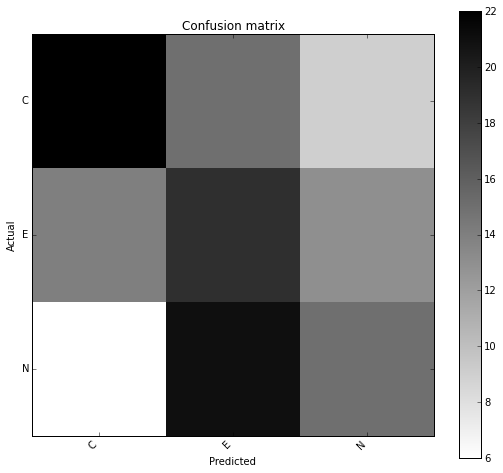

In [13]:
print('Accuracy:', accuracy_score(drug['str'], pred), '\n')
print(classification_report(drug['str'], pred))
# print(confusion_matrix(drug['str'], pred, labels=DRUGS))
ConfusionMatrix(drug['str'].values, pred).plot()
plt.savefig('svm_conf_mat.eps')

### ElasticNet

### Implementation A

ElasticNet logistic regression for multiclass classification

In [14]:
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [15]:
RETRAIN_ANYWAY = False
TRAINED_GRID_FILE = 'EN_grid.pickle'

clf = SGDClassifier(loss='log', penalty='elasticnet', n_jobs=-1)
if RETRAIN_ANYWAY or not os.path.exists(TRAINED_GRID_FILE):
    print('training')
    alpha_range = np.logspace(-2, 7, 10)
    l1_ratio_range = np.arange(0., 1., 0.1)
    param_grid = dict(alpha=alpha_range, l1_ratio=l1_ratio_range)
    grid = GridSearchCV(clf, param_grid=param_grid, cv=kf, n_jobs=-1)
    grid.fit(rma, drug['str'])
    
    with open(TRAINED_GRID_FILE, 'wb') as out:
        pickle.dump(grid, out)
else:
    print('read')
    with open(TRAINED_GRID_FILE, 'rb') as in_:
        grid = pickle.load(in_)

best_params = grid.best_params_

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

read
The best parameters are {'alpha': 0.01, 'l1_ratio': 0.5} with a score of 0.50


Show results:

In [16]:
clf = SGDClassifier(loss='log', penalty='elasticnet', n_jobs=-1, **best_params)
clf.fit(rma, drug['str'])
pred = cross_val_predict(clf, rma, y=drug['str'], cv=kf, n_jobs=-1)

Accuracy: 0.358208955224 

             precision    recall  f1-score   support

          C       0.29      0.30      0.29        46
          E       0.42      0.39      0.40        46
          N       0.38      0.38      0.38        42

avg / total       0.36      0.36      0.36       134



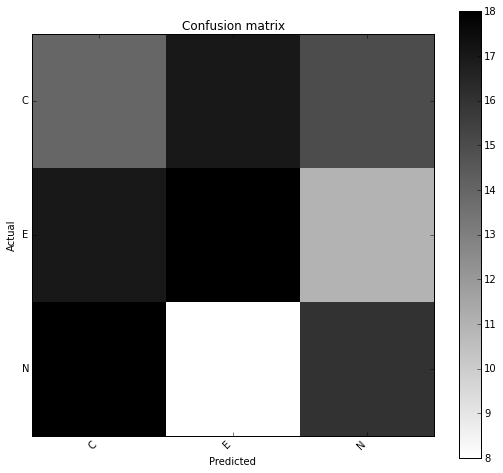

In [17]:
print('Accuracy:', accuracy_score(drug['str'], pred), '\n')
print(classification_report(drug['str'], pred))
# print(confusion_matrix(drug['str'], pred, labels=DRUGS))
ConfusionMatrix(drug['str'].values, pred).plot()
plt.savefig('en_conf_mat.eps')

### Implementation C

In [18]:
from sklearn.feature_selection import RFECV, RFE

In [19]:
clf = SGDClassifier(loss='log', penalty='elasticnet', n_jobs=-1, **best_params)
rfe = RFECV(clf, step=100, verbose=1)
rfe.fit(rma, drug['str'])

Finished fold with 1 / 374 feature ranks, score=0.347826
Finished fold with 2 / 374 feature ranks, score=0.304348
Finished fold with 3 / 374 feature ranks, score=0.347826
Finished fold with 4 / 374 feature ranks, score=0.347826
Finished fold with 5 / 374 feature ranks, score=0.347826
Finished fold with 6 / 374 feature ranks, score=0.304348
Finished fold with 7 / 374 feature ranks, score=0.347826
Finished fold with 8 / 374 feature ranks, score=0.304348
Finished fold with 9 / 374 feature ranks, score=0.347826
Finished fold with 10 / 374 feature ranks, score=0.347826
Finished fold with 11 / 374 feature ranks, score=0.347826
Finished fold with 12 / 374 feature ranks, score=0.304348
Finished fold with 13 / 374 feature ranks, score=0.347826
Finished fold with 14 / 374 feature ranks, score=0.347826
Finished fold with 15 / 374 feature ranks, score=0.347826
Finished fold with 16 / 374 feature ranks, score=0.326087
Finished fold with 17 / 374 feature ranks, score=0.304348
Finished fold with 18 /

RFECV(cv=None,
   estimator=SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.5, learning_rate='optimal',
       loss='log', n_iter=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
   estimator_params=None, scoring=None, step=100, verbose=1)

In [21]:
rfe2 = RFE(clf, n_features_to_select=200, step=100)
rfe2.fit(rma, drug['str'])

RFE(estimator=SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.5, learning_rate='optimal',
       loss='log', n_iter=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
  estimator_params=None, n_features_to_select=200, step=100, verbose=0)

In [22]:
rfe3 = RFECV(clf, step=10)
rfe3.fit(rma.iloc[:, rfe2.support_], drug['str'])
print(rfe3.n_features_)

80


In [27]:
support = np.zeros((rma.shape[1],), dtype=bool)
for n, (train_ix, test_ix) in enumerate(kf):
    print('Fold {}'.format(n))
    rfe_tmp = RFE(clf, n_features_to_select=80, step=100)
    rfe_tmp.fit(rma.iloc[train_ix], drug.ix[train_ix, 'str'])
    print('{} features selected'.format(rfe_tmp.n_features_))
    support |= rfe_tmp.support_

Fold 0
80 features selected
Fold 1
80 features selected
Fold 2
80 features selected
Fold 3
80 features selected
Fold 4
80 features selected
Fold 5
80 features selected
Fold 6
80 features selected
Fold 7
80 features selected
Fold 8
80 features selected
Fold 9
80 features selected
Fold 10
80 features selected
Fold 11
80 features selected
Fold 12
80 features selected
Fold 13
80 features selected
Fold 14
80 features selected
Fold 15
80 features selected
Fold 16
80 features selected
Fold 17
80 features selected
Fold 18
80 features selected
Fold 19
80 features selected


In [59]:
support.shape

(37231,)

In [30]:
clf = SGDClassifier(loss='log', penalty='elasticnet', n_jobs=-1, **best_params)
pred = cross_val_predict(clf, rma.iloc[:, support], y=drug['str'], cv=kf, n_jobs=-1)

Accuracy: 0.328358208955 

             precision    recall  f1-score   support

          C       0.33      0.33      0.33        46
          E       0.31      0.24      0.27        46
          N       0.35      0.43      0.38        42

avg / total       0.33      0.33      0.32       134



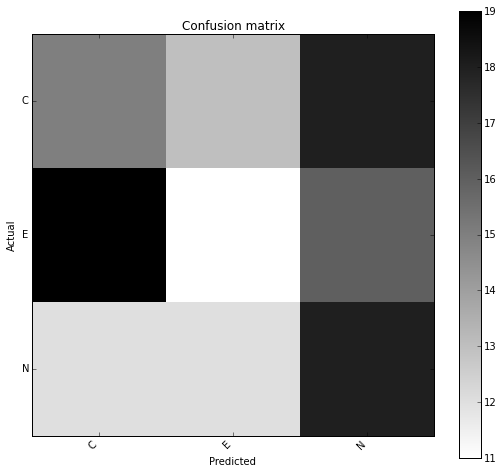

In [31]:
print('Accuracy:', accuracy_score(drug['str'], pred), '\n')
print(classification_report(drug['str'], pred))
# print(confusion_matrix(drug['str'], pred, labels=DRUGS))
ConfusionMatrix(drug['str'].values, pred).plot()
plt.savefig('rfe+en_conf_mat.eps')

In [ ]:
clf = SGDClassifier(loss='log', penalty='elasticnet', n_jobs=-1, **best_params)
feat_subset = np.arange(rma.shape[1])
for step in np.logspace(4, 0, 4):
    print('Step:', step)
    rfe = RFECV(clf, step=step)
    rfe.fit(rma.iloc[:, feat_subset], drug['str'])
    feat_subset = feat_subset[rfe.support_]
    print('{} features selected'.format(rfe.n_features_))

In [ ]:
clf = SGDClassifier(loss='log', penalty='elasticnet', n_jobs=-1, **best_params)
feat_subset = np.arange(rma.shape[1])
n_selected = rma.shape[1]
for step in np.logspace(4, 0, 5):
    n_to_select = 
    while n_to_select >= 1:
        rfe = RFE(clf, n_features_to_select=n_to_select, step=step)
        rfe.fit(rma.iloc[:, feat_subset], drug['str'])
        
    
    
    

In [93]:
'%s'.format('hi')

'%s'

In [88]:
print(np.logspace(4, 0, 5))
feat_subset = np.arange(rma.shape[1])
feat_subset

[  1.00000000e+04   1.00000000e+03   1.00000000e+02   1.00000000e+01
   1.00000000e+00]


array([    0,     1,     2, ..., 37228, 37229, 37230])

In [70]:
rma.iloc[:, rfe.support_]

ProbeID,1415753_at,1415801_at,1415862_at,1415903_at,1415908_at,1416039_x_at,1416041_at,1416050_a_at,1416102_at,1416123_at,...,1460132_at,1460327_at,1460354_a_at,1460449_at,1460462_at,1460498_a_at,1460511_at,1460633_at,1460650_at,1460724_at
230107_117_gendep_moe4302_md_a_n_dba_f.CEL,10.270460,7.450470,3.442241,7.520226,10.098939,5.069866,9.306149,7.381216,10.508169,4.078507,...,4.211420,5.778631,8.630610,9.538809,7.303897,7.214353,7.260766,7.748027,8.662656,8.073366
230107_11_gendep_moe4302_cms_a_e_c57_f.CEL,10.163903,7.455738,2.929786,8.581346,10.016102,4.268696,9.503688,7.376882,11.180189,5.590283,...,4.495128,5.492317,8.579916,9.610316,7.537279,6.984671,6.863045,7.355836,8.510427,8.327720
230107_120_gendep_moe4302_md_a_n_fvb_m.CEL,10.279863,7.570892,3.311598,8.571777,10.424214,4.730093,9.426697,7.092824,10.412616,4.275947,...,4.320677,6.289986,8.679746,10.213858,7.309297,7.444337,6.551092,7.261371,8.672509,8.272843
230107_123_gendep_moe4302_md_c_c_c57_f.CEL,10.216618,7.262406,3.463501,8.815010,9.868766,4.448037,9.090035,7.382175,10.954834,4.867313,...,4.294878,5.726084,8.167820,9.250059,7.812982,6.605226,6.978529,7.873905,8.053108,7.891559
230107_137_gendep_moe4302_md_c_n_129_f.CEL,10.287602,8.410923,3.430275,7.267606,9.926502,5.063564,9.297374,7.301735,11.964335,4.055194,...,4.914983,5.977177,8.152736,9.685891,7.615970,7.076354,6.869220,7.696766,8.752092,7.942350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280107_85_gendep_moe4302_env_c_e_dba_f.CEL,10.315938,7.206191,3.415986,7.621724,10.083386,4.295357,9.044704,7.430862,10.628186,4.075280,...,4.564090,5.823808,8.539086,9.643407,7.481052,7.019559,6.882998,7.500128,8.724906,8.581581
280107_88_gendep_moe4302_env_c_efvb_m.CEL,10.332503,8.114718,3.220691,8.723091,10.148778,4.435397,9.078572,7.245985,10.901597,3.783597,...,4.982915,5.990211,8.424295,9.869873,7.557151,7.451368,7.039584,7.694846,8.655939,8.347674
280107_8_gendep_moe4302_cms_a_c_fvb_m.CEL,10.292783,8.242057,3.066684,7.886718,10.259959,4.655178,9.342287,7.026564,11.164350,4.125825,...,4.524405,5.900714,8.657523,9.884771,7.404775,7.369481,7.175029,7.934972,8.524706,8.188203
280107_96_gendep_moe4302_env_c_n_fvb_m.CEL,10.321192,7.799718,3.160378,8.204617,10.404980,4.394369,9.273287,7.258474,10.777974,4.170526,...,4.641698,5.922790,8.257497,10.054949,7.608009,7.167737,7.185665,7.762185,8.712042,8.399211


In [65]:
probes90 = '[1] "1436720_s_at" "1428306_at" "1457425_at" "1437780_at" "1453695_at" [6] "1444249_at" "1439924_x_at" "1437996_s_at" "1441426_at" "1459909_at" [11] "1432573_at" "1417698_at" "1425482_s_at" "1447188_at" "1449386_at" [16] "1429991_at" "1430357_at" "1420239_x_at" "1441500_at" "1425449_at" [21] "1429289_at" "1432995_at" "1439597_at" "1432132_at" "1459719_at" [26] "1442797_x_at" "1415734_at" "1416556_at" "1456834_at" "1425463_at" [31] "1456123_at" "1454193_at" "1457862_at" "1434985_a_at" "1442930_at" [36] "1455302_at" "1431743_a_at" "1454421_at" "1430333_at" "1453336_at" [41] "1445615_at" "1444745_at" "1455909_at" "1438133_a_at" "1425298_a_at" [46] "1449731_s_at" "1432268_at" "1452108_at" "1443977_at" "1458609_at" [51] "1441182_at" "1455660_at" "1440997_at" "1417942_at" "1456501_at" [56] "1450322_s_at" "1431577_at" "1429359_s_at" "1459662_at" "1423009_at" [61] "1439823_at" "1454942_at" "1418027_at" "1431265_at" "1444515_at" [66] "1441778_at" "1457721_at" "1416143_at" "1432621_at" 11435524_at" [71] "1455455_at" "1419831_at" "1424979_at" "1431842_at" "1432495_at" [76] "1437302_at" "1452881_at" "1418201_at" "1458190_at" "1459188_at" [81] "1431905_s_at" "1427194_a_at" "1425172_at" "1457994_at" "1419764_at" [86] "1444816_at" "1440433_at" "1416466_at" "1447348_at" "1455233_at"'.split()
probes90 = [x[1:-1] for x in probes90 if x.endswith('_at"')]
probes90 = set(probes90)

In [66]:
probes160 = '[1] "1442274 at" "1442797 x at" "1437780 at" "1417942 at" "1437996 s at" [6] "1426234 s at" "1431577 at" "1444249 at" ' '1436720_s_at" "1437626_at" [11] "1453695 at" "1452221 a at" "1459553 at" ' '1445045_at" "1422651_at" [16] "1440445 at" "1459310 at" "1458009 at" ' '1432576 at" "1454942 at" [21] "1439924 x at" "1454320 at" "1427857 x at" "1443268 at" "1439597 at" [26] "1460163 at" "1438133_a_at" "1418361_at" "1455025_at" "1456910 at" [31] "1418555_x_at" "1450322_s_at" "1416039 x at" "1415875 at" "1445682 at" [36] "1459102 at" "1457474_at" "1429236 at" "1456501 at" "1443701 at" [41] "1455302_at" "1429991 at" "1426171 x at" "1444061 at" "1460405_at" [46] "1453540 at" "1438532_at" "1441271 at" "1459909 at" "1449386_at" [51] "1456751_x_at" "1458854_at" "1429398 at" "1445857 at" "1443894 at" [56] "1427738 at" "1419235_s_at" "1446917 at" "1419047 at" "1437922_at" [61] "1419569 a at" "1447237_at" "1424118_a_at" "1437515_at" "1436637 at" [66] "1430357_at" "1450096 at" "1443099 at" "1441500 at" "1443272_at" [71] "1456834 at" "1430090 at" "1418590 at" "1459188 at" "1454303_at" [76] "1459507_at" "1425172 at" "1444453_at" "1431953_at" "1458609_at" [81] "1421921 at" "1426431 at" "1428306_at" "1460273_a_at" "1437572_at" [86] "1444816 at" "1460086 at" "1445735 at" "1432102_at" "1425818 at" [91] "1443124 at" "1442796 at" "1444867 at" "1420729_at" "1432236 a at" [96] "1453743_x_at" "1457946 at" "1416862 at" "1448757 at" "1455233 at" [101] "1438233_at" "1429289 at" "1421362 a at' ' "1446773 at" "1422230 s at" [106] "1446221 at" "1441896 x at" "1419294 at" "1423344 at" "1419166 at" [111] "1442825 at" "1457662 x at" "1440985 at" "1458856_at" "1431952 at" [116] "1437876 at" "1441426 at" "1432867 at" "1440064 at" "1449950 at" [121] "1434892 x at" "1458253 at" "1459643 at" "1446168 at" "1446142 at" [126] "1458698 at" "1438380 at" "1440433 at" "1453859 at" "1432030 at" [131] "1458644 at" "1429492 x at" "1431842 at" "1451613 at" "1431464 a at" [136] "1443987_at" "1449879 at" "1430114 at" "1420368 at" "1451869 at" [141] "1418541_at" "1426952 at" "1446051 at" "1454808 at" "1422262 a at" [146] "1457425_at" "1442177 at" "1416325 at" "1453671 at" "1459128 at" [151] "1449742 at" "1438810 at" "1427499 at" "1454428_at" "1453750 x at" [156] "1451596 a at" "1446370 at" "1437038 x at' ' "1417536 at" "1418953 at"'
probes160 = probes160.replace("' '", '"')
probes160 = probes160.replace(" x at", "_x_at")
probes160 = probes160.replace(" a at", "_a_at")
probes160 = probes160.replace(" s at", "_s_at")
probes160 = probes160.replace(" at", "_at")
probes160 = probes160.split()
probes160 = [x for x in probes160 if not x.startswith('[')]
probes160 = [x.replace('"', "") for x in probes160]
probes160 = set(probes160)

In [64]:
selected_set = set(rma.columns[support].values)
len(selected_set)

331

In [68]:
selected_set & probes160

{'1437626_at',
 '1438233_at',
 '1439597_at',
 '1440064_at',
 '1453750_x_at',
 '1459909_at',
 '1460086_at'}

In [25]:
foo = np.full((4,), np.nan)
foo[1] = 1
foo[2] = 50
np.nanstd(foo)

24.5